In [51]:
import numpy as np # Programación vectorial
import matplotlib.pyplot as plt # Visualización
import pandas as pd # Estructura y manipulación de datos
import scipy.stats as stats
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [56]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [57]:
url = '/content/drive/MyDrive/Machine Learning/Prueba1/WA_Fn-UseC_-HR-Employee-Attrition.csv'
df = pd.read_csv(url, sep=",", encoding='utf-8')

In [58]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


Age: Edad del empleado. (Numérica)<br><br>
Attrition: Si el empleado dejó la empresa o no (Sí/No). (Categórica)<br>
<br>BusinessTravel: Frecuencia de viajes de negocios (Sin viajes, viajes poco frecuentes, viajes frecuentes). (Categórica)<br><br>
DailyRate: Tarifa diaria de pago del empleado. (Numérica)<br><br>
Department: Departamento al que pertenece el empleado (por ejemplo, Ventas, I + D, Recursos Humanos). (Categórica)<br><br>
DistanceFromHome: Distancia desde la casa del empleado hasta el lugar de trabajo. (Numérica)<br><br>
Education: Nivel de educación del empleado (por ejemplo, 1: Secundaria, 2:Bachillerato, 3:Universidad, 4:Maestría, 5:Doctorado). (Categórica ordinal)<br><br>
EducationField: Campo de estudio del empleado (por ejemplo, Ciencias de la vida, Médica, Marketing, Recursos humanos, Técnica, Otro). (Categórica)<br><br>
EmployeeCount: Este campo parece redundante ya que todos los valores son 1. (Numérica)<br><br>
EmployeeNumber: Número de identificación único del empleado. (Numérica)<br><br>
EnvironmentSatisfaction: Satisfacción del empleado con el entorno laboral (1: Bajo, 2: Medio, 3: Alto, 4: Muy alto). (Categórica ordinal)<br><br>
Gender: Género del empleado (Masculino/Femenino). (Categórica)<br><br>
HourlyRate: Tarifa por hora de pago del empleado. (Numérica)<br><br>
JobInvolvement: Nivel de participación del empleado en su trabajo (1: Bajo, 2: Medio, 3: Alto, 4: Muy alto). (Categórica ordinal)<br><br>
JobLevel: Nivel del puesto de trabajo del empleado (1: Bajo, 2: Medio, 3: Alto, etc.). (Categórica ordinal)<br><br>
JobRole: Rol o cargo del empleado (por ejemplo, Representante de ventas, Gerente, Investigador). (Categórica)<br><br>
JobSatisfaction: Satisfacción del empleado con su trabajo (1: Bajo, 2: Medio, 3: Alto, 4: Muy alto). (Categórica ordinal)<br><br>
MaritalStatus: Estado civil del empleado (Soltero, Casado, Divorciado). (Categórica)<br><br>
MonthlyIncome: Ingreso mensual del empleado. (Numérica)<br><br>
MonthlyRate: Tarifa mensual de pago del empleado. (Numérica)<br><br>
NumCompaniesWorked: Número de empresas en las que ha trabajado el empleado. (Numérica)<br><br>
Over18: Si el empleado es mayor de 18 años o no (Sí/No). (Categórica)<br><br>
OverTime: Si el empleado trabaja horas extras o no (Sí/No). (Categórica)<br><br>
PercentSalaryHike: Porcentaje de aumento salarial del empleado. (Numérica)<br><br>
PerformanceRating: Calificación de desempeño del empleado (1: Bajo, 2: Bueno, 3: Excelente, 4: Sobresaliente). (Categórica ordinal)<br><br>
RelationshipSatisfaction: Satisfacción del empleado con sus relaciones laborales (1: Bajo, 2: Medio, 3: Alto, 4: Muy alto). (Categórica ordinal)<br><br>
StandardHours: Horas estándar de trabajo del empleado. (Numérica)<br><br>
StockOptionLevel: Nivel de opciones sobre acciones del empleado (0: Ninguna, 1: Bajo, 2: Medio, 3: Alto). (Categórica ordinal)<br><br>
TotalWorkingYears: Total de años de experiencia laboral del empleado. (Numérica)<br><br>
TrainingTimesLastYear: Número de veces que el empleado recibió capacitación el año pasado. (Numérica)<br><br>
WorkLifeBalance: Equilibrio entre la vida laboral y personal del empleado (1: Malo, 2: Bueno, 3: Mejor, 4: Excelente). (Categórica ordinal)<br><br>
YearsAtCompany: Años que el empleado ha estado en la empresa. (Numérica)<br><br>
YearsInCurrentRole: Años que el empleado ha estado en su puesto actual. (Numérica)<br><br>
YearsSinceLastPromotion: Años desde la última promoción del empleado. (Numérica)<br><br>
YearsWithCurrManager: Años que el empleado ha estado con su gerente actual. (Numérica)<br><br>

In [ ]:
float_cols = df.select_dtypes(include=['float64']).columns
df[float_cols] = df[float_cols].astype(int)

In [ ]:
df.describe() # Para todas las variables numéricas
df['Age'].mean() # Media de la edad
df['MonthlyIncome'].median() # Mediana del ingreso mensual
df['YearsAtCompany'].std() # Desviación estándar de los años en la empresa

6.126525152403566

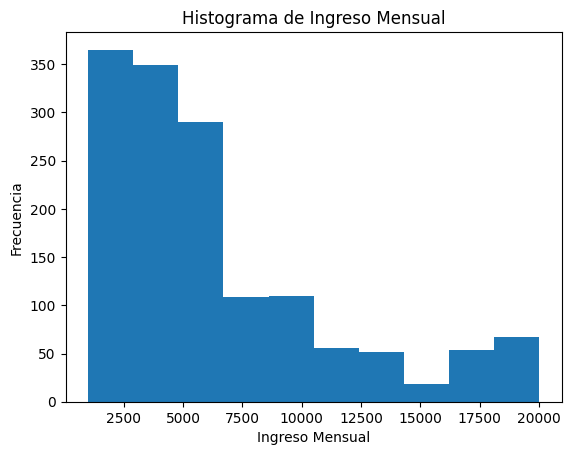

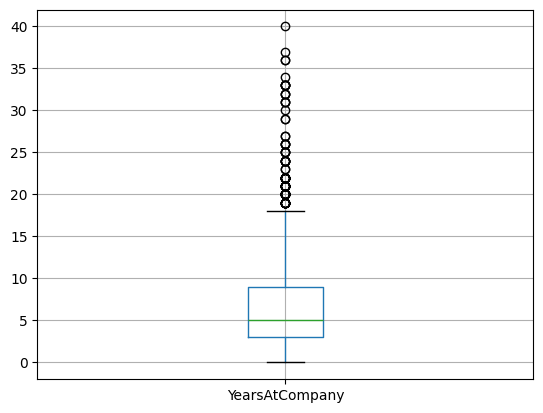

In [ ]:
plt.hist(df['MonthlyIncome'], bins=10)
plt.xlabel('Ingreso Mensual')
plt.ylabel('Frecuencia')
plt.title('Histograma de Ingreso Mensual')
plt.show()

df.boxplot(column=['YearsAtCompany']) # Boxplot de los años en la empresa
plt.show()

El histograma muestra una distribución sesgada a la derecha (o positiva). Esto significa que la mayoría de los empleados tienen ingresos mensuales en el rango inferior, mientras que hay menos empleados con ingresos muy altos.<br><br>

La mediana del boxplot nos indica que los empleados han pasado al menos 5 años dentro de la empresa <br><br>

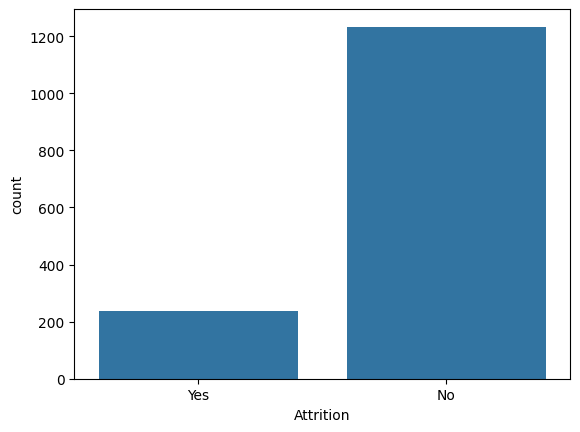

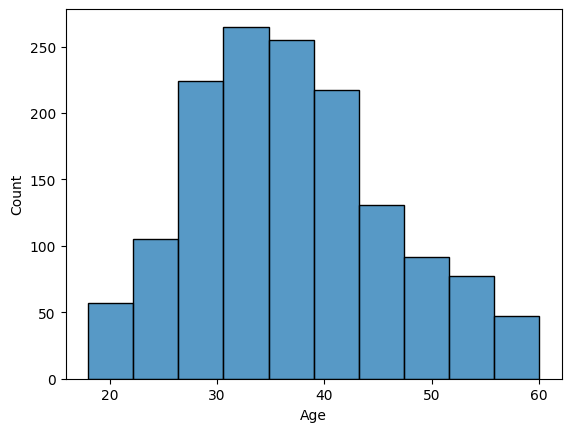

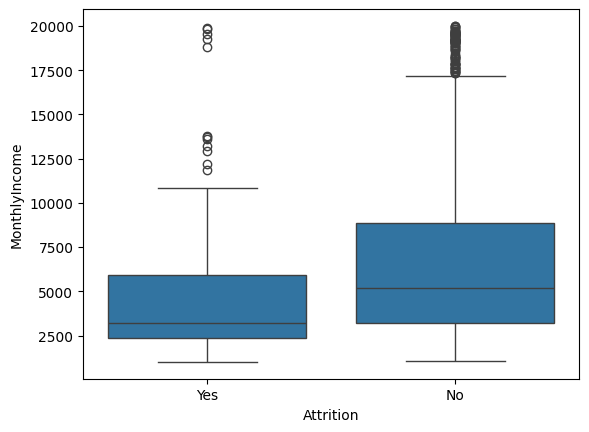

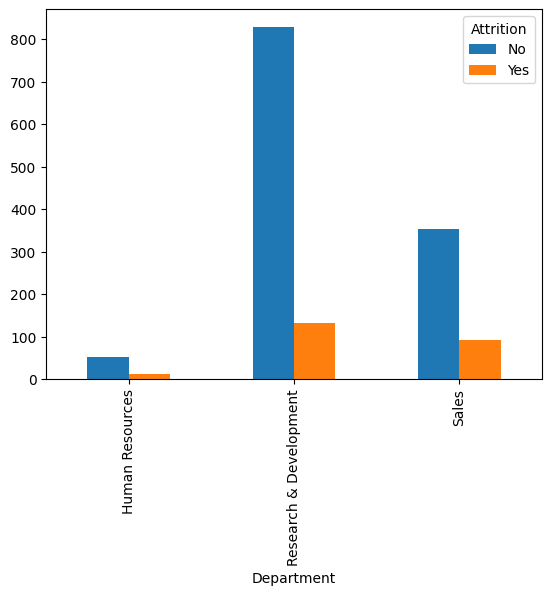

In [ ]:
import seaborn as sns

sns.countplot(x='Attrition', data=df) # Gráfico de barras de la variable Attrition
plt.show()#La mayoría de los empleados no han dejado la empresa.
#Hay una cantidad menor de empleados que sí han dejado la empresa
#La rotación de empleados es relativamente baja, ya que la barra de la categoría "No" es mucho más alta que la barra de la categoría "Yes".


sns.histplot(df['Age'], bins=10) # Histograma de la edad con 10 bins
plt.show()
#La mayoría de los empleados se encuentran en el rango de edad entre [aproximadamente 30-40 años].
#Hay una menor cantidad de empleados en los rangos de edad más jóvenes y mayores.
#La distribución de la edad es ligeramente asimétrica a la derecha, lo que indica una mayor concentración de empleados más jóvenes.

sns.boxplot(x='Attrition', y='MonthlyIncome', data=df) # Boxplot del ingreso mensual por attrition
plt.show()
#La mediana del ingreso mensual para los empleados que se han ido es menor a la mediana para los empleados que se han quedado .

pd.crosstab(df['Department'], df['Attrition']).plot(kind='bar') # Tabla de frecuencia cruzada de departamento y attrition
plt.show()

In [ ]:
Q1 = df['MonthlyIncome'].quantile(0.25)
Q3 = df['MonthlyIncome'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df[(df['MonthlyIncome'] < lower_bound) | (df['MonthlyIncome'] > upper_bound)]
print(outliers)

      Age Attrition     BusinessTravel  DailyRate              Department  \
25     53        No      Travel_Rarely       1282  Research & Development   
29     46        No      Travel_Rarely        705                   Sales   
45     41       Yes      Travel_Rarely       1360  Research & Development   
62     50        No      Travel_Rarely        989  Research & Development   
105    59        No         Non-Travel       1420         Human Resources   
...   ...       ...                ...        ...                     ...   
1374   58        No      Travel_Rarely        605                   Sales   
1377   49        No  Travel_Frequently       1064  Research & Development   
1401   55        No      Travel_Rarely        189         Human Resources   
1437   39        No         Non-Travel        105  Research & Development   
1443   42        No      Travel_Rarely        300  Research & Development   

      DistanceFromHome  Education    EducationField  EmployeeCount  \
25   

No hay diferencia significativa en la edad promedio entre los dos grupos y la edad promedio de los empleados que se fueron es diferente a la de los que se quedaron.

In [26]:
alpha = 0.05  # Nivel de significancia
#separamos los datos en dos grupos "Yes" y "No"
age_attrition_yes = df[df['Attrition'] == 'Yes']['Age']
age_attrition_no = df[df['Attrition'] == 'No']['Age']
#Realizamos una prueba t de students
t_statistic, p_value = stats.ttest_ind(age_attrition_yes, age_attrition_no)
#Imprimimos los resultados
print("T-statistic:", t_statistic)
print("P-value:", p_value)

#Con este ciclo if conseguiremos interpretar los resultados en el caso de que p_value sea menor que 0.05
#la diferencia de edad entre los dos grupos seria significativa, y en el caso contrario no habria mayor diferencia entre ñas edades.
if p_value < alpha:
  print("Hay evidencia de una diferencia significativa en la edad promedio entre los dos grupos.")
else:
  print("No se rechaza una diferencia nula.")
  print("No hay evidencia de una diferencia significativa en la edad promedio entre los dos grupos.")

T-statistic: nan
P-value: nan
No se rechaza la hipótesis nula.
No hay evidencia de una diferencia significativa en la edad promedio entre los dos grupos.


<ipython-input-26-a221b37190aa>:4: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  t_statistic, p_value = stats.ttest_ind(age_attrition_yes, age_attrition_no)


In [41]:
# Creamos una tabla de contingencia
contingency_table = pd.crosstab(df['JobSatisfaction'], df['Attrition'])
#La prueba Chi-cuadrado evalúa si hay una relación significativa entre dos variables categóricas
# Realizamos la prueba Chi-cuadrado de independencia
chi2_statistic, p_value, dof, expected = stats.chi2_contingency(contingency_table)

# Imprimimos los resultados
print("Chi-cuadrado statistic:", chi2_statistic)
print("P-value:", p_value)
print("Degrees of freedom:", dof)
print("Expected frequencies:", expected)

#Con el ciclo if veremos si hay una diferencia significativa o no si el valor de p_value es menor a 0.05
#Entoncces la diferencia es significativa entre la satisfacción laboral y la rotación
alpha = 0.05  # Nivel de significancia

if p_value < alpha:
  print("Hay evidencia de una asociación significativa entre la satisfacción laboral y la rotación.")
else:
  print("No hay evidencia de una asociación significativa entre la satisfacción laboral y la rotación.")

Chi-cuadrado statistic: 17.505077010348
P-value: 0.0005563004510387556
Degrees of freedom: 3
Expected frequencies: [[242.40612245  46.59387755]
 [234.85714286  45.14285714]
 [370.73877551  71.26122449]
 [384.99795918  74.00204082]]
Se rechaza la hipótesis nula.
Hay evidencia de una asociación significativa entre la satisfacción laboral y la rotación.


La prueba Chi-cuadrado indica que hay una relación estadísticamente significativa entre la satisfacción laboral y la rotación de empleados en el conjunto de datos por ende los empleados insatisfechos tienen una mayor probabilidad de dejar la empresa.

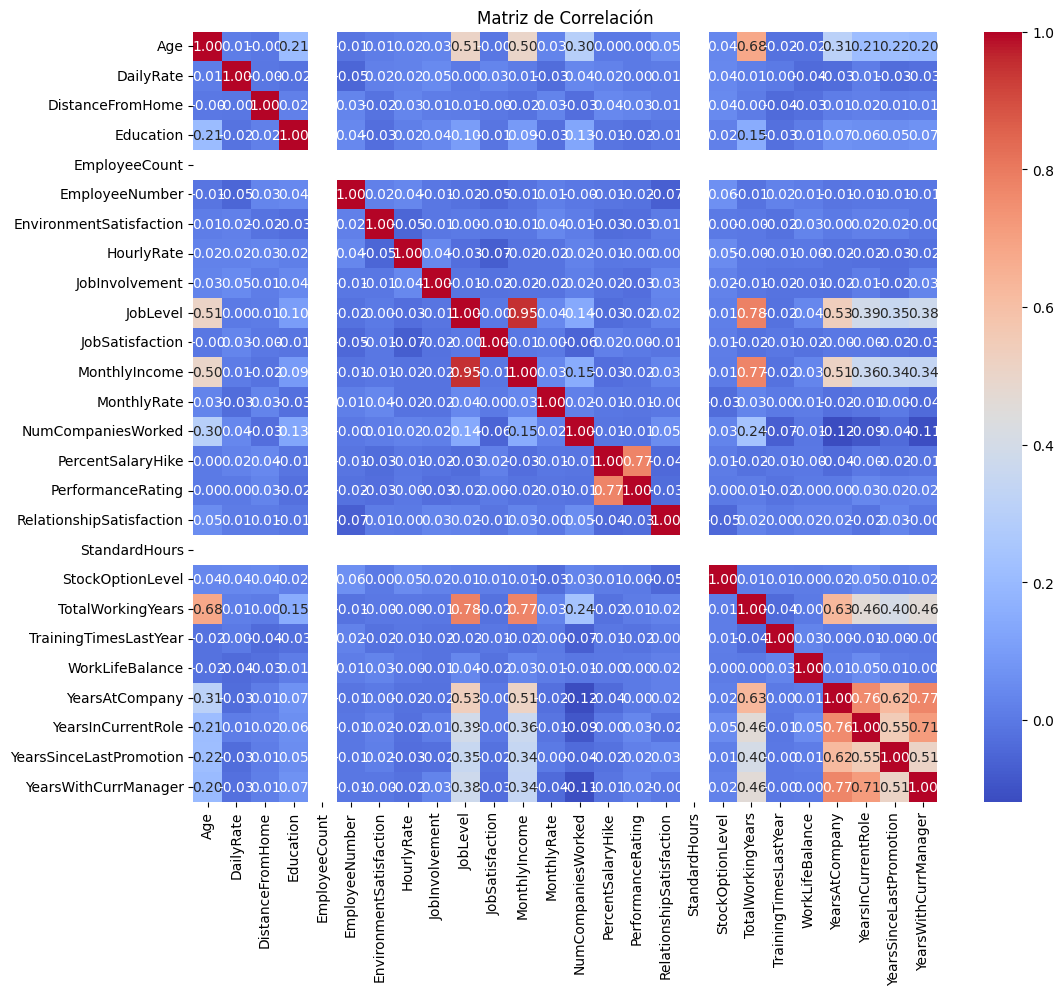

In [48]:
# Matriz de correlación
#Seleccionamos solo las columnas con valores numericos.
numeric_df = df.select_dtypes(include=np.number)
#Hacemos un calculo de la matriz de correlación
correlation_matrix = numeric_df.corr()
#Con estas lineas de codigo realizamos un mapa de calor de la correlación
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación')
plt.show()

Valores cercanos a 1: Indican una fuerte correlación positiva (las variables tienden a aumentar o disminuir juntas).<p>
Valores cercanos a -1: Indican una fuerte correlación negativa (cuando una variable aumenta, la otra tiende a disminuir).<p>
Valores cercanos a 0: Indican una correlación débil o nula.

JobLevel y MonthlyIncome: Tienen una correlación positiva fuerte (probablemente alrededor de 0.9 o más). Esto indica que a medida que aumenta el nivel del trabajo, también tiende a aumentar el ingreso mensual, por ende podemos deducir que los empleados con niveles de trabajo más altos tienden a tener ingresos mensuales más altos<p>
TotalWorkingYears y JobLevel: También muestran una correlación positiva fuerte, lo que sugiere que las personas con más años de experiencia laboral tienden a ocupar puestos de trabajo de mayor nivel, por ende podemos deducir que las personas con menos experiencia, poseen un trabajo de menor nivel de importancia.<p>
Age y JobSatisfaction: Podrían tener una correlación cercana a 0, indicando una relación débil o nula entre la edad y la satisfacción laboral, por ende podemos deducir que no es importante la edad con la satifacción laboral de la empresa, no son variables que influyan dentro de esta<p>
StandardHours y cualquier otra variable: Si las horas estándar de trabajo son las mismas para todos los empleados, no habrán diferencias de horario laboral.<p>

In [49]:
# Probabilidad de rotación dado que el departamento es "Sales"
p_attrition_given_sales = len(df[(df['Attrition'] == 'Yes') & (df['Department'] == 'Sales')]) / len(df[df['Department'] == 'Sales'])

print(f"La probabilidad de rotación dado que el departamento es 'Sales' es: {p_attrition_given_sales}")

La probabilidad de rotación dado que el departamento es 'Sales' es: 0.2062780269058296


In [67]:
df['NuevoSalario'] = df['MonthlyIncome'] * 1.10

In [68]:
# Creamos la variable "NuevoSalario"
df['NuevoSalario'] = df['MonthlyIncome'] * 1.10

# Seleccionar las variables predictoras (incluyendo el salario) y la variable objetivo (Attrition)
X = df[['NuevoSalario', 'JobSatisfaction', 'WorkLifeBalance', 'Age', 'TotalWorkingYears']]  # Incluimos variables relevantes como 'Age', 'TotalWorkingYears', etc.
y = df['Attrition']  # Asumiendo que 'Attrition' es una variable binaria (0/1)

# Dividimos los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar el modelo de regresión logística
modelo = LogisticRegression()
modelo.fit(X_train, y_train)

#Con esta linea de codigo predecimos.
probabilidades_nuevo_salario = modelo.predict_proba(X_test)[:, 1]  # Probabilidad de Attrition = 1

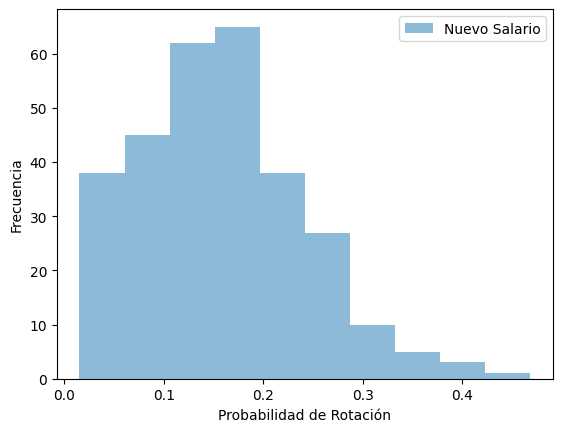

In [63]:
#Mostramos un nuevo histograma con el nuevo salario y sus probabilidades de que hubiese menos rotación.
plt.hist(probabilidades_nuevo_salario, label='Nuevo Salario', alpha=0.5)
plt.xlabel('Probabilidad de Rotación')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()

La mayoría de las probabilidades en el histograma se concentran en valores bajos con esto podríamos concluir que el aumento de salario tiene un efecto positivo en la retención de empleados, ya que reduce la probabilidad de rotación para la mayoría, por la satisfacción al recibir un aumento del 10% de su salario